In [1]:
import pandas as pd
import getstock as gs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})
import numpy as np
import getstock as gs
apikey="E4064FN6TOZL073U"

In [2]:
ups = pd.DataFrame(gs.getDailyStockPrices("UPS", apikey)['adjusted_close'])
facebook = pd.DataFrame(gs.getDailyStockPrices("FB", apikey)['adjusted_close'])
target = pd.DataFrame(gs.getDailyStockPrices("TGT", apikey)['adjusted_close'])
pepsi = pd.DataFrame(gs.getDailyStockPrices("PEP", apikey)['adjusted_close'])
lv = pd.DataFrame(gs.getDailyStockPrices("LVMUY", apikey)['adjusted_close'])

ups = ups['2019-01-01':'2019-12-31']
facebook = facebook['2019-01-01':'2019-12-31']
target = target['2019-01-01':'2019-12-31']
pepsi = pepsi['2019-01-01':'2019-12-31']
lv = lv['2019-01-01':'2019-12-31']

In [3]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [4]:
portfolio1 = pd.concat([ups,facebook,target], axis=1)
portfolio1.columns=['ups', 'facebook', 'target']
mean1 = expected_returns.mean_historical_return(portfolio1)
sample_cov1 = risk_models.sample_cov(portfolio1)
np.mean(portfolio1.pct_change())*252
return1 = portfolio1.pct_change()
portfolio1.pct_change().cov()*252**0.5

,ups,facebook,target
ups,0.003710,0.001056,0.000886
facebook,0.001056,0.004845,0.000479
target,0.000886,0.000479,0.006987


In [5]:
ef1 = EfficientFrontier(mean1, sample_cov1)
raw_weights1 = ef1.max_sharpe()
cleaned_weights1 = ef1.clean_weights()
print(cleaned_weights1)
ef1.portfolio_performance(verbose=True)

{'ups': 0.09161, 'facebook': 0.40164, 'target': 0.50676}
Expected annual return: 58.2%
Annual volatility: 21.7%
Sharpe Ratio: 2.59


(0.5823792096763759, 0.2168402354975026, 2.593518718452291)

In [6]:
port_run = 10000

In [7]:
def calc_portfolio_risk(weights, returns_cov):
    return np.sqrt(np.dot(weights.T, np.dot(returns_cov * 252, weights)))

Best Sharpe: 2.686317286875439 was in portfolio 3628
Lowest Risk: 0.18579462784637268 was in portfolio 7126


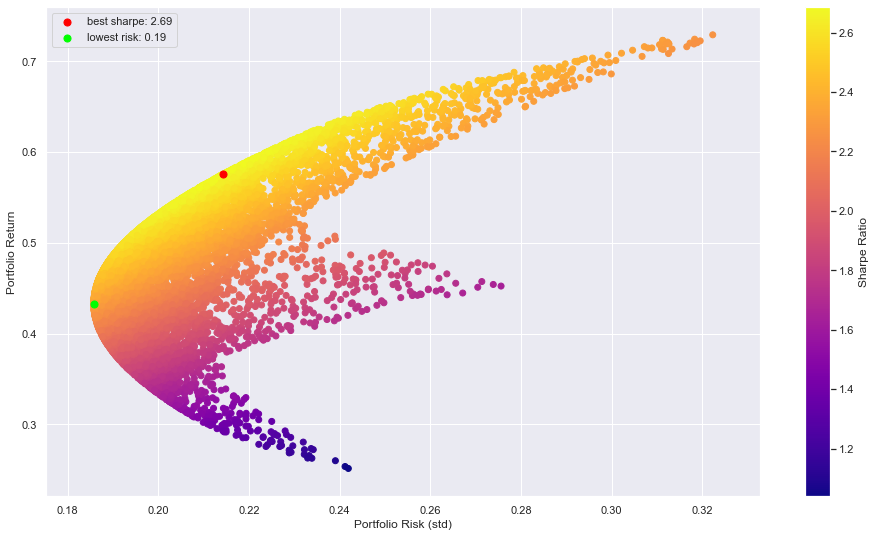

In [8]:
port_weight1 = np.zeros((port_run, len(portfolio1.columns)))
port_return1 = np.zeros(port_run)
port_risk1 = np.zeros(port_run)
port_sharpe1 = np.zeros(port_run)
returns_mean1 = return1.mean()
returns_cov1 = return1.cov()

for i in np.arange(port_run):
    weights = np.array(np.random.random(len(portfolio1.columns)))
    
    weights = weights / np.sum(weights)
   
    port_weight1[i, :] = weights

    port_return1[i] = np.sum((returns_mean1 * weights * 252))
   
    port_risk1[i] = calc_portfolio_risk(weights, returns_cov1)
    
    port_sharpe1[i] = port_return1[i] / port_risk1[i]
    
best_sharpe = port_sharpe1.max()
best_sharpe_idx = port_sharpe1.argmax()
print("Best Sharpe: {} was in portfolio {}".format(best_sharpe, best_sharpe_idx))

lowest_risk = port_risk1.min()
lowest_risk_idx = port_risk1.argmin()
print("Lowest Risk: {} was in portfolio {}".format(lowest_risk, lowest_risk_idx))

fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(port_risk1, port_return1, c=port_sharpe1, cmap='plasma')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Portfolio Risk (std)')
plt.ylabel('Portfolio Return')
plt.scatter(port_risk1[best_sharpe_idx], port_return1[best_sharpe_idx], c='red', s=50, 
            label="best sharpe: {:.2f}".format(best_sharpe))
plt.scatter(port_risk1[lowest_risk_idx], port_return1[lowest_risk_idx], c='#00ff00', s=50, 
            label="lowest risk: {:.02f}".format(lowest_risk))

plt.legend()
plt.show()

In [9]:
portfolio2 = pd.concat([ups,target,pepsi], axis=1)
portfolio2.columns=['ups', 'target', 'pepsi']
mean2 = expected_returns.mean_historical_return(portfolio2)
sample_cov2 = risk_models.sample_cov(portfolio2)
np.mean(portfolio2.pct_change())*252
return2 = portfolio2.pct_change()
portfolio2.pct_change().cov()*252**0.5

,ups,target,pepsi
ups,0.003710,0.000886,0.000360
target,0.000886,0.006987,0.000407
pepsi,0.000360,0.000407,0.001215


In [33]:
ef2 = EfficientFrontier(mean2, sample_cov2)
raw_weights2 = ef2.max_sharpe()
cleaned_weights2 = ef2.clean_weights()
print(cleaned_weights2)
ef2.portfolio_performance(verbose=True)

{'ups': 0.08811, 'target': 0.32717, 'pepsi': 0.58472}
Expected annual return: 42.0%
Annual volatility: 15.1%
Sharpe Ratio: 2.65


(0.41963709812213523, 0.15096861920981625, 2.64715342972515)

Best Sharpe2: 2.7809930402423926 was in portfolio 5281
Lowest Risk2: 0.1259750516831618 was in portfolio 7380


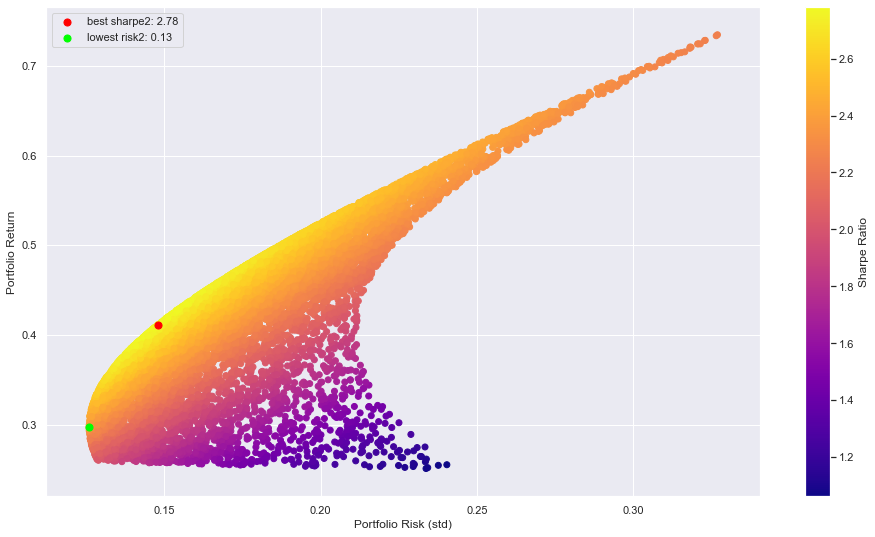

In [34]:
port_weight2 = np.zeros((port_run, len(portfolio2.columns)))
port_return2 = np.zeros(port_run)
port_risk2 = np.zeros(port_run)
port_sharpe2 = np.zeros(port_run)
returns_mean2 = return2.mean()
returns_cov2 = return2.cov()

for i in np.arange(port_run):
    weights = np.array(np.random.random(len(portfolio2.columns)))
    
    weights = weights / np.sum(weights)
   
    port_weight2[i, :] = weights

    port_return2[i] = np.sum((returns_mean2 * weights * 252))
   
    port_risk2[i] = calc_portfolio_risk(weights, returns_cov2)
    
    port_sharpe2[i] = port_return2[i] / port_risk2[i]
    
best_sharpe2 = port_sharpe2.max()
best_sharpe_idx2 = port_sharpe2.argmax()
print("Best Sharpe2: {} was in portfolio {}".format(best_sharpe2, best_sharpe_idx2))

lowest_risk2 = port_risk2.min()
lowest_risk_idx2 = port_risk2.argmin()
print("Lowest Risk2: {} was in portfolio {}".format(lowest_risk2, lowest_risk_idx2))

fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(port_risk2, port_return2, c=port_sharpe2, cmap='plasma')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Portfolio Risk (std)')
plt.ylabel('Portfolio Return')
plt.scatter(port_risk2[best_sharpe_idx2], port_return2[best_sharpe_idx2], c='red', s=50, 
            label="best sharpe2: {:.2f}".format(best_sharpe2))
plt.scatter(port_risk2[lowest_risk_idx2], port_return2[lowest_risk_idx2], c='#00ff00', s=50, 
            label="lowest risk2: {:.02f}".format(lowest_risk2))

plt.legend()
plt.show()

In [35]:
portfolio3 = pd.concat([ups,pepsi,lv], axis=1)
portfolio3.columns=['ups', 'pepsi', 'lv']
mean3 = expected_returns.mean_historical_return(portfolio3)
sample_cov3 = risk_models.sample_cov(portfolio3)
np.mean(portfolio3.pct_change())*252
return3 = portfolio3.pct_change()
portfolio3.pct_change().cov()*252**0.5

,ups,pepsi,lv
ups,0.003710,0.000360,0.001227
pepsi,0.000360,0.001215,0.000715
lv,0.001227,0.000715,0.003449


In [36]:
ef3 = EfficientFrontier(mean3, sample_cov3)
raw_weights3 = ef3.max_sharpe()
cleaned_weights3 = ef3.clean_weights()
print(cleaned_weights3)
ef3.portfolio_performance(verbose=True)

{'ups': 0.04462, 'pepsi': 0.50543, 'lv': 0.44995}
Expected annual return: 38.0%
Annual volatility: 14.9%
Sharpe Ratio: 2.41


(0.38002353466873656, 0.14942995195970504, 2.409313059043342)

Best Sharpe: 2.544466772549539 was in portfolio 46
Lowest Risk: 0.12746174415733258 was in portfolio 884


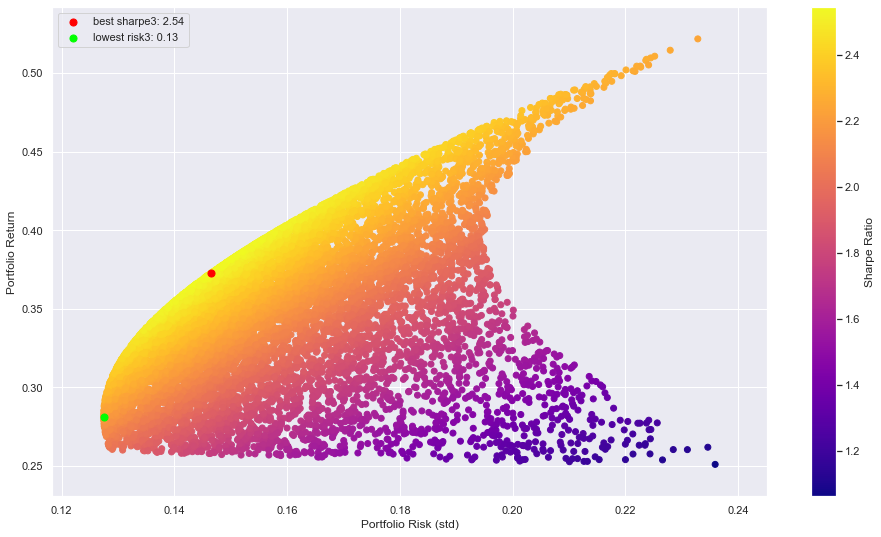

In [37]:
port_weight3 = np.zeros((port_run, len(portfolio3.columns)))
returns_mean3 = return3.mean()
returns_cov3 = return3.cov()
port_return3 = np.zeros(port_run)
port_risk3 = np.zeros(port_run)
port_sharpe3 = np.zeros(port_run)

for i in np.arange(port_run):
    weights = np.array(np.random.random(len(portfolio3.columns)))
    
    weights = weights / np.sum(weights)
   
    port_weight3[i, :] = weights

    port_return3[i] = np.sum((returns_mean3 * weights * 252))
   
    port_risk3[i] = calc_portfolio_risk(weights, returns_cov3)
    
    port_sharpe3[i] = port_return3[i] / port_risk3[i]
    
best_sharpe3 = port_sharpe3.max()
best_sharpe_idx3 = port_sharpe3.argmax()
print("Best Sharpe: {} was in portfolio {}".format(best_sharpe3, best_sharpe_idx3))

lowest_risk3 = port_risk3.min()
lowest_risk_idx3 = port_risk3.argmin()
print("Lowest Risk: {} was in portfolio {}".format(lowest_risk3, lowest_risk_idx3))

fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(port_risk3, port_return3, c=port_sharpe3, cmap='plasma')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Portfolio Risk (std)')
plt.ylabel('Portfolio Return')
plt.scatter(port_risk3[best_sharpe_idx3], port_return3[best_sharpe_idx3], c='red', s=50, 
            label="best sharpe3: {:.2f}".format(best_sharpe3))
plt.scatter(port_risk3[lowest_risk_idx3], port_return3[lowest_risk_idx3], c='#00ff00', s=50, 
            label="lowest risk3: {:.02f}".format(lowest_risk3))

plt.legend()
plt.show()

In [38]:
portfolio4 = pd.concat([ups,facebook,pepsi], axis=1)
portfolio4.columns=['ups', 'facebook', 'pepsi']
mean4 = expected_returns.mean_historical_return(portfolio4)
sample_cov4 = risk_models.sample_cov(portfolio4)
np.mean(portfolio4.pct_change())*252
return4 = portfolio4.pct_change()
portfolio4.pct_change().cov()*252**0.5

,ups,facebook,pepsi
ups,0.003710,0.001056,0.000360
facebook,0.001056,0.004845,0.000542
pepsi,0.000360,0.000542,0.001215


In [39]:
ef4 = EfficientFrontier(mean4, sample_cov4)
raw_weights4 = ef4.max_sharpe()
cleaned_weights4 = ef4.clean_weights()
print(cleaned_weights4)
ef4.portfolio_performance(verbose=True)

{'ups': 0.10799, 'facebook': 0.25485, 'pepsi': 0.63716}
Expected annual return: 31.1%
Annual volatility: 13.4%
Sharpe Ratio: 2.17


(0.3106402119830613, 0.1342258616379055, 2.165307105773007)

In [40]:
portfolio5 = pd.concat([ups,facebook,lv], axis=1)
portfolio5.columns=['ups', 'facebook', 'lv']
mean5 = expected_returns.mean_historical_return(portfolio5)
sample_cov5 = risk_models.sample_cov(portfolio5)
np.mean(portfolio5.pct_change())*252
return5 = portfolio5.pct_change()
portfolio5.pct_change().cov()*252**0.5

,ups,facebook,lv
ups,0.003710,0.001056,0.001227
facebook,0.001056,0.004845,0.001546
lv,0.001227,0.001546,0.003449


In [41]:
ef5 = EfficientFrontier(mean5, sample_cov5)
raw_weights5 = ef5.max_sharpe()
cleaned_weights5 = ef5.clean_weights()
print(cleaned_weights5)
ef5.portfolio_performance(verbose=True)

{'ups': 0.04493, 'facebook': 0.27565, 'lv': 0.67942}
Expected annual return: 49.2%
Annual volatility: 20.5%
Sharpe Ratio: 2.30


(0.49220327657027557, 0.2050341160462457, 2.3030473448807394)

In [42]:
portfolio6 = pd.concat([ups,target,lv], axis=1)
portfolio6.columns=['ups', 'target', 'lv']
mean6 = expected_returns.mean_historical_return(portfolio6)
sample_cov6 = risk_models.sample_cov(portfolio6)
np.mean(portfolio6.pct_change())*252
return6 = portfolio6.pct_change()
portfolio6.pct_change().cov()*252**0.5

,ups,target,lv
ups,0.003710,0.000886,0.001227
target,0.000886,0.006987,0.001170
lv,0.001227,0.001170,0.003449


In [43]:
ef6 = EfficientFrontier(mean6, sample_cov6)
raw_weights6 = ef6.max_sharpe()
cleaned_weights6 = ef6.clean_weights()
print(cleaned_weights6)
ef6.portfolio_performance(verbose=True)

{'ups': 0.01767, 'target': 0.41101, 'lv': 0.57133}
Expected annual return: 61.0%
Annual volatility: 21.4%
Sharpe Ratio: 2.75


(0.6095133758728931, 0.21435710074490327, 2.7501462457940518)

Best Sharpe6: 2.8439779364152176 was in portfolio 3474
Lowest Risk6: 0.1845316057563084 was in portfolio 2077


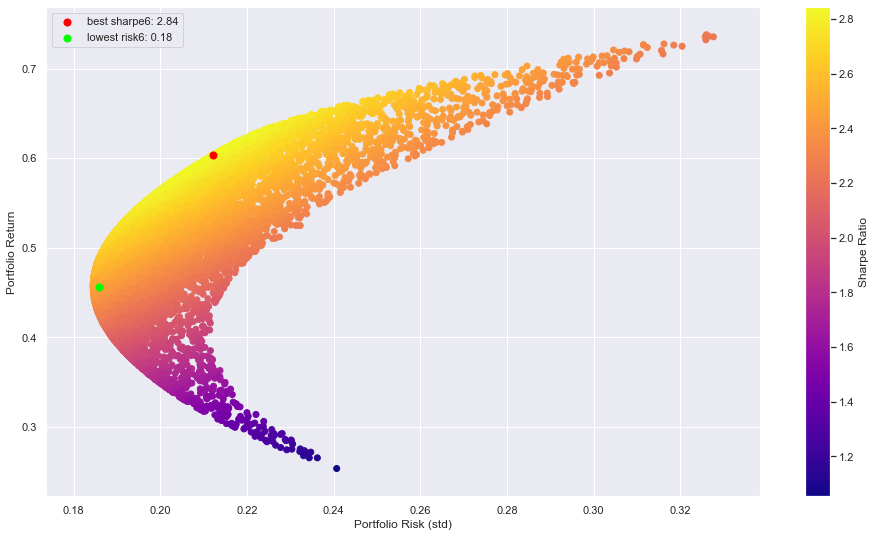

In [65]:
port_weight6 = np.zeros((port_run, len(portfolio6.columns)))
port_return6 = np.zeros(port_run)
port_risk6 = np.zeros(port_run)
port_sharpe6 = np.zeros(port_run)
returns_mean6 = return6.mean()
returns_cov6 = return6.cov()

for i in np.arange(port_run):
    weights = np.array(np.random.random(len(portfolio6.columns)))
    
    weights = weights / np.sum(weights)
   
    port_weight6[i, :] = weights

    port_return6[i] = np.sum((returns_mean6 * weights * 252))
   
    port_risk6[i] = calc_portfolio_risk(weights, returns_cov6)
    
    port_sharpe6[i] = port_return6[i] / port_risk6[i]
    
best_sharpe6 = port_sharpe6.max()
best_sharpe_idx6 = port_sharpe6.argmax()
print("Best Sharpe6: {} was in portfolio {}".format(best_sharpe6, best_sharpe_idx6))

lowest_risk6 = port_risk6.min()
lowest_risk_idx6 = port_risk6.argmin()
print("Lowest Risk6: {} was in portfolio {}".format(lowest_risk6, lowest_risk_idx6))

fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(port_risk6, port_return6, c=port_sharpe6, cmap='plasma')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Portfolio Risk (std)')
plt.ylabel('Portfolio Return')
plt.scatter(port_risk6[best_sharpe_idx6], port_return6[best_sharpe_idx6], c='red', s=50, 
            label="best sharpe6: {:.2f}".format(best_sharpe6))
plt.scatter(port_risk6[lowest_risk_idx2], port_return6[lowest_risk_idx6], c='#00ff00', s=50, 
            label="lowest risk6: {:.02f}".format(lowest_risk6))

plt.legend()
plt.show()

In [44]:
portfolio7 = pd.concat([facebook,target,pepsi], axis=1)
portfolio7.columns=['facebook', 'target', 'pepsi']
mean7 = expected_returns.mean_historical_return(portfolio7)
sample_cov7 = risk_models.sample_cov(portfolio7)
np.mean(portfolio7.pct_change())*252
return7 = portfolio7.pct_change()
portfolio7.pct_change().cov()*252**0.5

,facebook,target,pepsi
facebook,0.004845,0.000479,0.000542
target,0.000479,0.006987,0.000407
pepsi,0.000542,0.000407,0.001215


In [45]:
ef7 = EfficientFrontier(mean7, sample_cov7)
raw_weights7 = ef7.max_sharpe()
cleaned_weights7 = ef7.clean_weights()
print(cleaned_weights7)
ef7.portfolio_performance(verbose=True)

{'facebook': 0.21814, 'target': 0.30649, 'pepsi': 0.47536}
Expected annual return: 45.2%
Annual volatility: 15.2%
Sharpe Ratio: 2.84


(0.45239536847729855, 0.1520496002929898, 2.8437783962871355)

In [46]:
portfolio8 = pd.concat([facebook,pepsi,lv], axis=1)
portfolio8.columns=['facebook',  'pepsi', 'lv']
mean8 = expected_returns.mean_historical_return(portfolio8)
sample_cov8 = risk_models.sample_cov(portfolio8)
np.mean(portfolio8.pct_change())*252
return8 = portfolio8.pct_change()
portfolio8.pct_change().cov()*252**0.5

,facebook,pepsi,lv
facebook,0.004845,0.000542,0.001546
pepsi,0.000542,0.001215,0.000715
lv,0.001546,0.000715,0.003449


In [47]:
ef8 = EfficientFrontier(mean8, sample_cov8)
raw_weights8 = ef8.max_sharpe()
cleaned_weights8 = ef8.clean_weights()
print(cleaned_weights8)
ef8.portfolio_performance(verbose=True)

{'facebook': 0.16381, 'pepsi': 0.45582, 'lv': 0.38036}
Expected annual return: 39.4%
Annual volatility: 14.9%
Sharpe Ratio: 2.50


(0.39369606619249214, 0.1492342489113091, 2.5040905081686855)

In [48]:
portfolio9 = pd.concat([target,pepsi,lv], axis=1)
portfolio9.columns=['target', 'pepsi', 'lv']
mean9 = expected_returns.mean_historical_return(portfolio9)
sample_cov9 = risk_models.sample_cov(portfolio9)
np.mean(portfolio9.pct_change())*252
return9 = portfolio9.pct_change()
portfolio9.pct_change().cov()*252**0.5

,target,pepsi,lv
target,0.006987,0.000407,0.001170
pepsi,0.000407,0.001215,0.000715
lv,0.001170,0.000715,0.003449


In [49]:
ef9 = EfficientFrontier(mean9, sample_cov9)
raw_weights9 = ef9.max_sharpe()
cleaned_weights9 = ef9.clean_weights()
print(cleaned_weights9)
ef9.portfolio_performance(verbose=True)

{'target': 0.27639, 'pepsi': 0.40263, 'lv': 0.32098}
Expected annual return: 48.0%
Annual volatility: 15.8%
Sharpe Ratio: 2.91


(0.4799081373225746, 0.1578116877349548, 2.914284384911919)

In [50]:
portfolio10 = pd.concat([facebook,target,lv], axis=1)
portfolio10.columns=['facebook', 'target', 'lv']
mean10 = expected_returns.mean_historical_return(portfolio10)
sample_cov10 = risk_models.sample_cov(portfolio10)
np.mean(portfolio10.pct_change())*252
return10 = portfolio10.pct_change()
portfolio10.pct_change().cov()*252**0.5

,facebook,target,lv
facebook,0.004845,0.000479,0.001546
target,0.000479,0.006987,0.001170
lv,0.001546,0.001170,0.003449


In [51]:
ef10 = EfficientFrontier(mean10, sample_cov10)
raw_weights10 = ef10.max_sharpe()
cleaned_weights10 = ef10.clean_weights()
print(cleaned_weights10)
ef10.portfolio_performance(verbose=True)

{'facebook': 0.22205, 'target': 0.36673, 'lv': 0.41122}
Expected annual return: 58.9%
Annual volatility: 19.8%
Sharpe Ratio: 2.87


(0.5890831346646649, 0.1982206925082232, 2.870957252059123)